In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import numpy as np
from matplotlib.colors import ListedColormap


%matplotlib inline

In [28]:
cifar100 = pd.DataFrame(data={
    'Precision': [32, 16, 8, 4, 2, 1],
    'Individually Trained': [63.81, 60.41, 60.73, 60.81, 53.69, 37.00],
    'Model Distillation (No TA)': [np.nan, 64.33, 61.68, 62.24, 57.80, 41.99],
    'Model Distillation with TA': [np.nan, 64.06, 64.06, 64.27, 57.84, 40.03],
})

cifar100

,Precision,Individually Trained,Model Distillation (No TA),Model Distillation with TA
0,32,63.81,NaN,NaN
1,16,60.41,64.33,64.06
2,8,60.73,61.68,64.06
3,4,60.81,62.24,64.27
4,2,53.69,57.80,57.84
5,1,37.00,41.99,40.03


In [35]:
cifar100_melted = cifar100.melt('Precision')
cifar100_melted

,Precision,variable,value
0,32,Individually Trained,63.81
1,16,Individually Trained,60.41
2,8,Individually Trained,60.73
3,4,Individually Trained,60.81
4,2,Individually Trained,53.69
5,1,Individually Trained,37.00
6,32,Model Distillation (No TA),NaN
7,16,Model Distillation (No TA),64.33
8,8,Model Distillation (No TA),61.68
9,4,Model Distillation (No TA),62.24


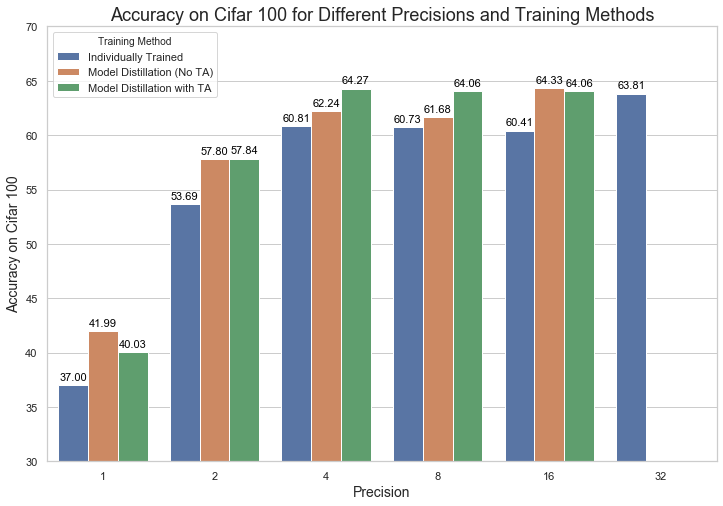

In [70]:
fig, ax = plt.subplots(figsize=(12, 8))

chart = sns.barplot(x='Precision', y='value', hue='variable', data=cifar100_melted, ax=ax)
chart.set_ybound(30, 70)
chart.get_legend().set_title('Training Method')
chart.set_xlabel('Precision', fontsize=14)
chart.set_ylabel('Accuracy on Cifar 100', fontsize=14)
chart.set_title('Accuracy on Cifar 100 for Different Precisions and Training Methods', fontsize=18)

for p in chart.patches:
    chart.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 8),
                textcoords='offset points')

chart.figure.savefig("cifar100_different_precisions_and_methods.png")